In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.dates as mdates

In [7]:
sdem_file = "static/data/oil_sup_dem_gap.csv"
sdem_df = pd.read_csv(sdem_file)
sdem_df['year'] = pd.to_datetime(sdem_df['year'], format ='%Y')
use_sdem_df = sdem_df.loc[sdem_df["year"]>"2008-01-01", ["year", "oil_supply", "oil_demand", "gap_analysis"]]

use_sdem_df.sort_values(by='year')
# oil_price_df1= oil_price_df.rename(columns={"date":"Date", "value": "oil_price"})
# count = oil_price_df['date'].value_counts()
# count
use_sdem_df.head()

,year,oil_supply,oil_demand,gap_analysis
38,2009-01-01,4004.59,3901.04,103.55
39,2010-01-01,4104.06,4060.54,43.52
40,2011-01-01,4150.46,4055.99,94.47
41,2012-01-01,4245.08,4103.59,141.49
42,2013-01-01,4265.12,4159.10,106.03


In [8]:
oil_file = "static/data/oil_price.csv"
oil_price_df = pd.read_csv(oil_file)
oil_price_df['Date'] = pd.to_datetime(oil_price_df['Date'],errors="coerce")

oil_price_df.sort_values(by='Date')
# oil_price_df1= oil_price_df.rename(columns={"date":"Date", "value": "oil_price"})
# count = oil_price_df['date'].value_counts()
# count
oil_price_df

,Date,oil_price
0,2009-06-29,71.470
1,2009-06-30,69.820
2,2009-07-01,69.320
3,2009-07-02,66.680
4,2009-07-06,64.060
...,...,...
3269,2022-06-20,108.618
3270,2022-06-21,109.746
3271,2022-06-22,106.190
3272,2022-06-23,104.270


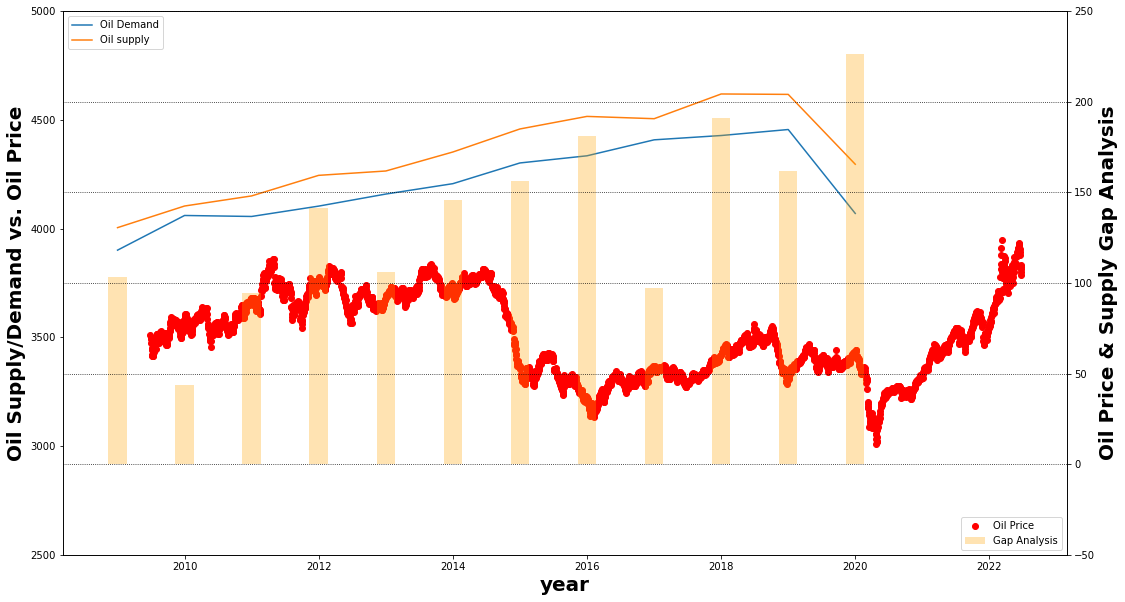

In [38]:
# ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
# ax1.gca().xaxis.set_major_locator(mdates.DayLocator())

# ax1.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
# ax1.gcf().autofmt_xdate()
fig, ax1 = plt.subplots()
ax1.plot(use_sdem_df['year'], use_sdem_df['oil_demand'], label = 'Oil Demand')
ax1.plot(use_sdem_df['year'], use_sdem_df['oil_supply'], label = 'Oil supply')
ax1.set_ylabel("Oil Supply/Demand vs. Oil Price", fontweight='bold', fontsize = '20')
ax1.legend(loc =2)
ax1.set_ylim(2500, 5000)

ax2 = ax1.twinx()
ax2.bar(use_sdem_df['year'], use_sdem_df['gap_analysis'],color='orange', alpha = 0.3, width = 100, label = 'Gap Analysis')
ax2.scatter(oil_price_df['Date'], oil_price_df['oil_price'],marker='o',color='red', label = 'Oil Price')
ax2.set_ylabel("Oil Price & Supply Gap Analysis", fontweight='bold', fontsize = '20')
ax2.set_ylim(-50, 250)

plt.xticks(rotation = 45)
ax1.set_xlabel('year', fontweight='bold', fontsize = '20')

# plt.figure(figsize=(15, 8))
rcParams['figure.figsize']= 18,10
plt.legend(loc=4)
ax2.grid(True, color = 'k', linestyle= ":")
# plt.ylim(-35, 135)